In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
pd.options.display.max_columns = None

### Import Data

In [3]:
path = r'/Users/henning/Documents/Data Analytics Portfolio/Instacart Project - ICP'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_data.pkl'))

In [5]:
# creating a subset of one row for each order
df_unique_orders = df.drop_duplicates(subset=['customer', 'order_number'])

### Age distribution based on civil status

In [6]:
# Using original customer data for the visualization
df_customer = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_cleaned.pkl'))

/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='age', ylabel='civil_status'>

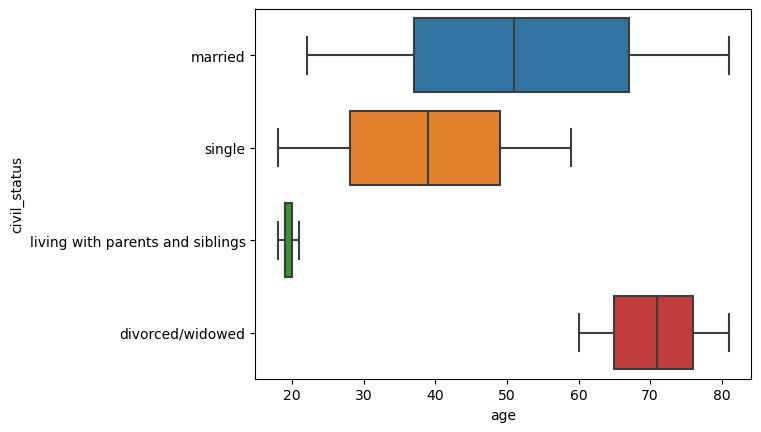

In [7]:
# using a boxplot
sns.boxplot(x = 'age', y = 'civil_status',data = df_customer)

## Visualizations with code provided by ChatGPT

### Redoing the Histograms

/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


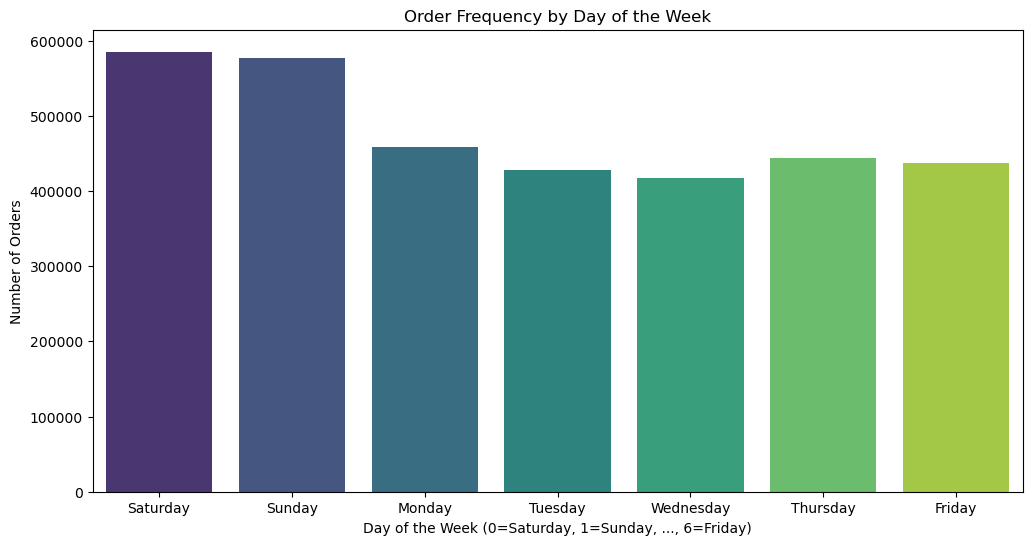

In [8]:
# On which weekdays are the order placed?
plt.figure(figsize=(12, 6))
sns.countplot(x='order_weekday', data=df_unique_orders, palette='viridis')
plt.title('Order Frequency by Day of the Week')
plt.xlabel('Day of the Week (0=Saturday, 1=Sunday, ..., 6=Friday)')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 7), ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])


# Save the figure to subfolder
plt.savefig(os.path.join(path, '04 Analysis', 'Frequency_by_weekday.jpg'), format='jpg', dpi=300)

# Show the plot
plt.show()

/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


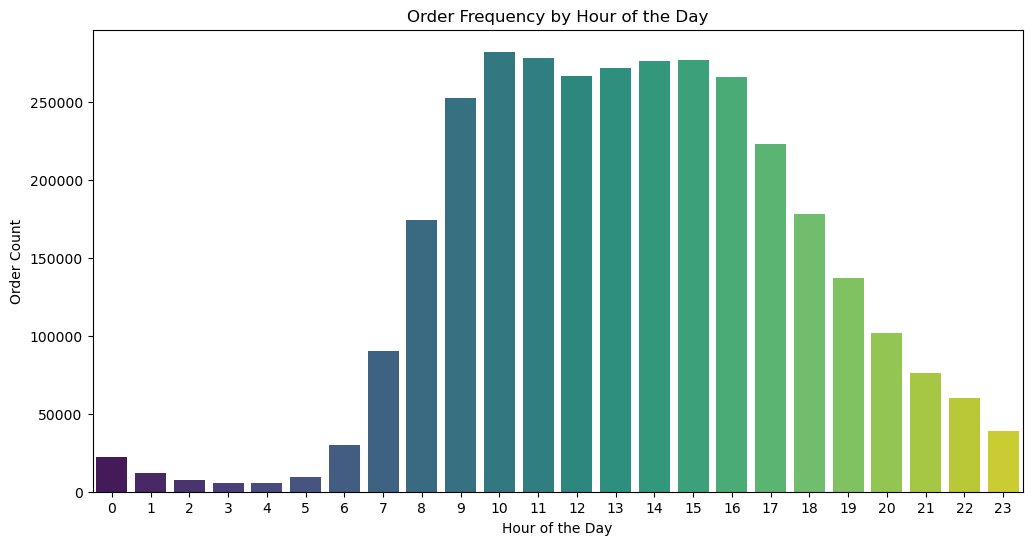

In [9]:
# in which hour of the day are the orders placed?
plt.figure(figsize=(12, 6))
sns.countplot(x='order_hour_of_day', data=df_unique_orders, palette="viridis")
plt.title('Order Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Order Count')

# Save the figure to subfolder
plt.savefig(os.path.join(path, '04 Analysis', 'Frequency_by_hour.jpg'), format='jpg', dpi=300)

# Show the plot
plt.show()

### Top 10 Most Reordered Products

In [10]:
# Counting the number of reorders for each product
reorder_product_count = df[df['reordered'] == 1]['product_name'].value_counts().reset_index()
reorder_product_count.columns = ['product_name', 'reorder_count']

/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


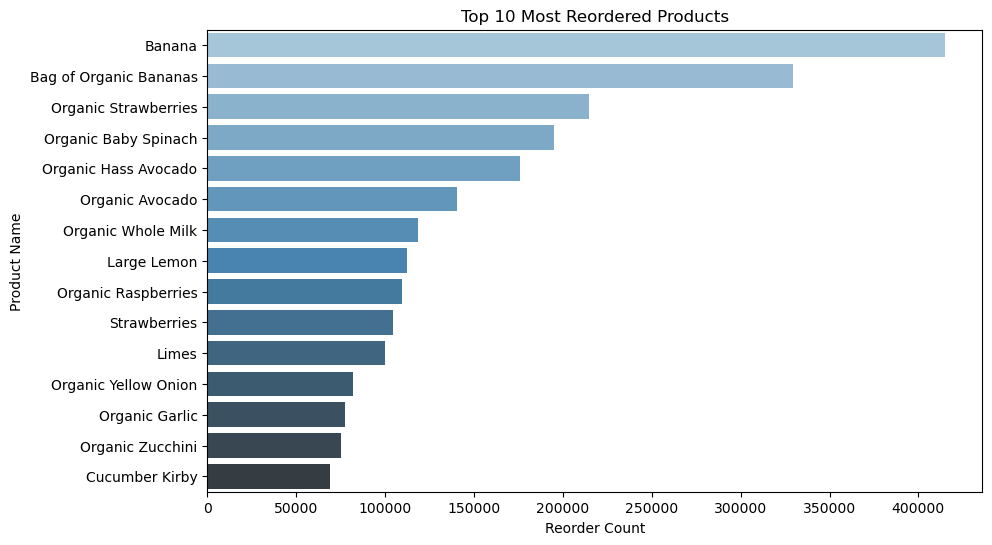

In [11]:
# Visualizing the top 15 most reordered products

plt.figure(figsize=(10, 6))
sns.barplot(x='reorder_count', y='product_name', data=reorder_product_count.head(15), palette="Blues_d")
plt.title('Top 10 Most Reordered Products')
plt.xlabel('Reorder Count')
plt.ylabel('Product Name')

# Save the figure to subfolder
plt.savefig(os.path.join(path, '04 Analysis', 'top_ten_products.jpg'), format='jpg', dpi=300)

# Show the plot
plt.show()

### Distribution of Total Spend per Customer

In [12]:
# creating a subset to exclude outliers (any order that costs more than 600)
df_unique_orders_cap = df_unique_orders

In [13]:
df_unique_orders_cap.loc[df_unique_orders_cap['order_total'] >600, 'order_total'] = np.nan

/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


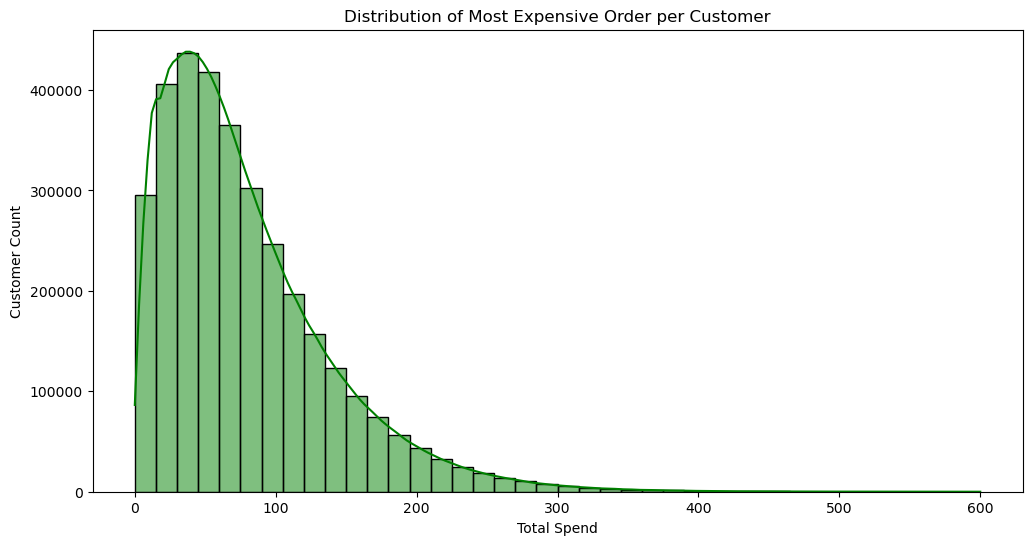

In [14]:
# Visualizing the distribution of most expensive order per customer, ex

plt.figure(figsize=(12, 6))
sns.histplot(df_unique_orders_cap['order_total'], bins=40, kde=True, color='green')
plt.title('Distribution of Most Expensive Order per Customer')
plt.xlabel('Total Spend')
plt.ylabel('Customer Count')

# Save the figure to subfolder
plt.savefig(os.path.join(path, '04 Analysis', 'Distribution_most_expensive_order.jpg'), format='jpg', dpi=300)

# Show the plot
plt.show()


/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


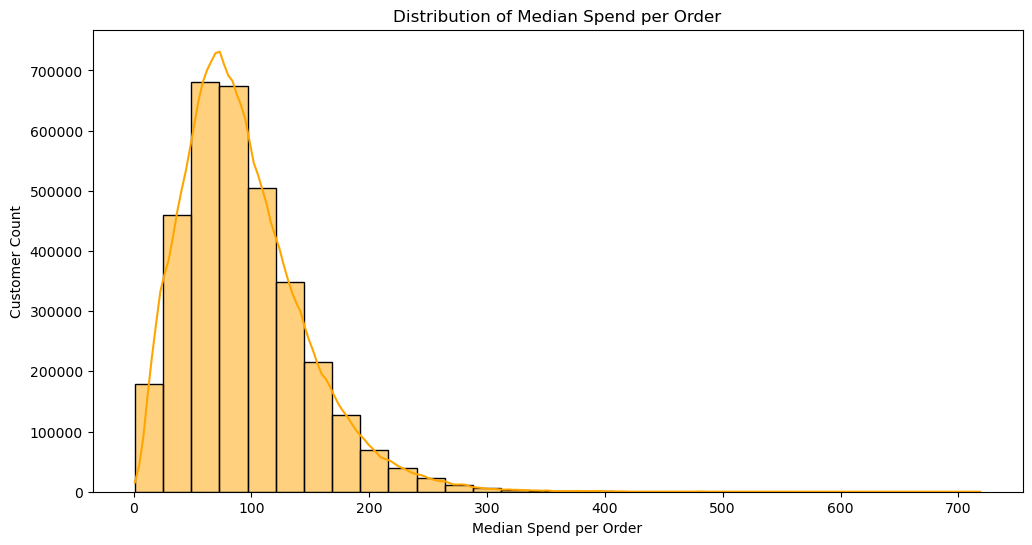

In [15]:
# Visualizing the distribution of median spend per order

plt.figure(figsize=(12, 6))
sns.histplot(df_unique_orders_cap['median_price_per_order'], bins=30, kde=True, color='orange')
plt.title('Distribution of Median Spend per Order')
plt.xlabel('Median Spend per Order')
plt.ylabel('Customer Count')

# Save the figure to subfolder
plt.savefig(os.path.join(path, '04 Analysis', 'Distribution_median_spend.jpg'), format='jpg', dpi=300)

# Show the plot
plt.show()

### Product Analysis: Popularity of Departments and Aisles

In [16]:
# Counting the number of orders by department

department_order_count = df['department'].value_counts().reset_index()

department_order_count.columns = ['department', 'order_count']

/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


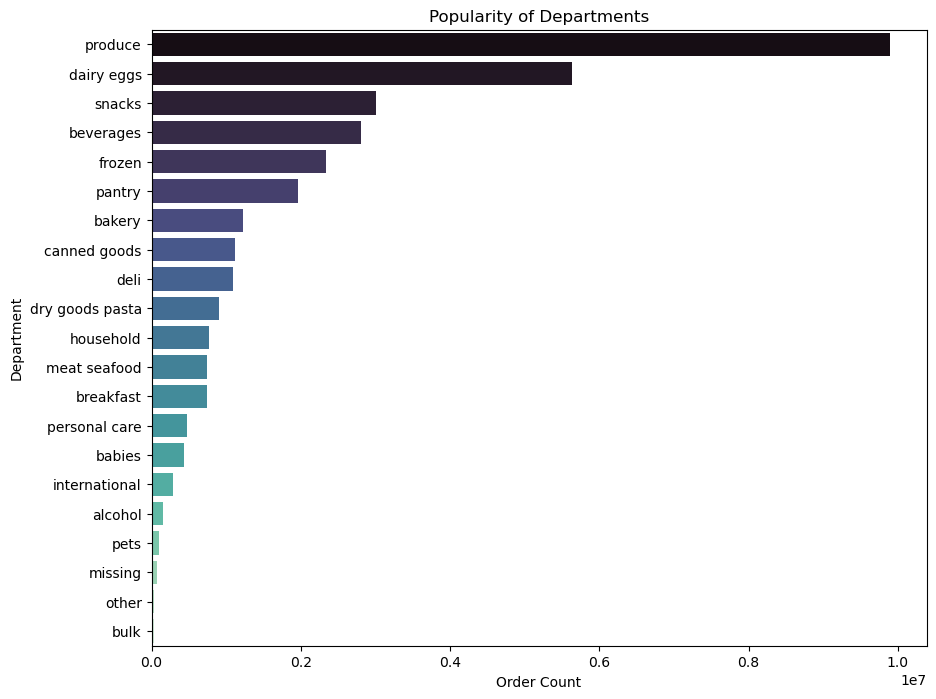

In [17]:
# Visualizing the popularity of departments

plt.figure(figsize=(10, 8))
sns.barplot(y='department', x='order_count', data=department_order_count, palette="mako")
plt.title('Popularity of Departments')
plt.xlabel('Order Count')
plt.ylabel('Department')

# Save the figure to subfolder
plt.savefig(os.path.join(path, '04 Analysis', 'most_popular_departement.jpg'), format='jpg', dpi=300)

# Show the plot
plt.show()

In [18]:
# Counting the number of orders by aisle

aisle_order_count = df['aisle'].value_counts().reset_index()

aisle_order_count.columns = ['aisle', 'order_count']

/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


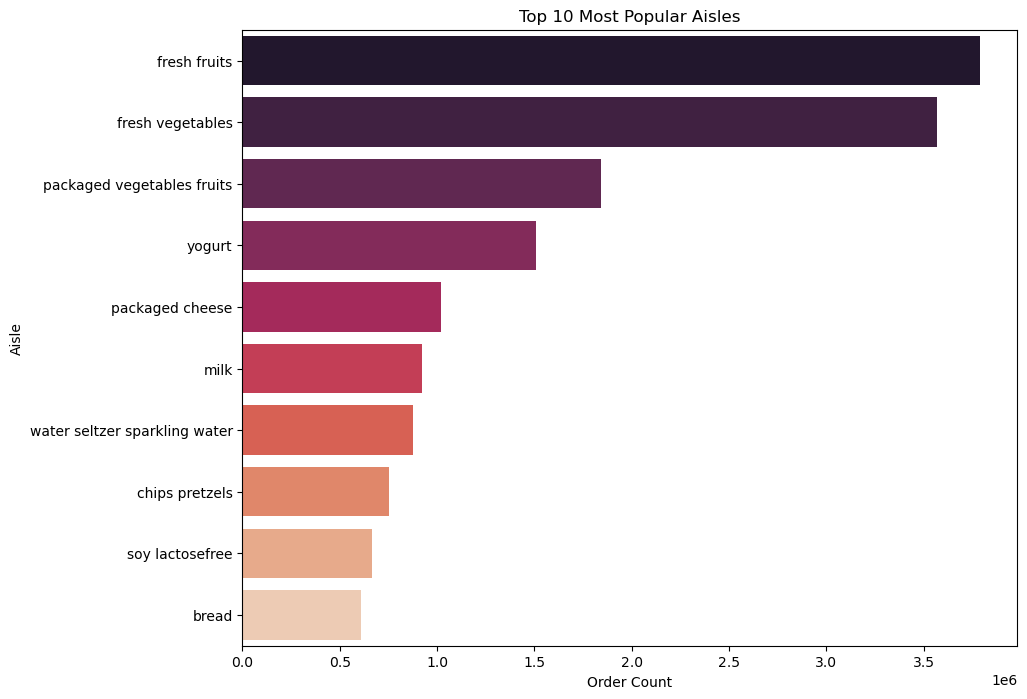

In [19]:
# Visualizing the popularity of aisles

plt.figure(figsize=(10, 8))
sns.barplot(y='aisle', x='order_count', data=aisle_order_count.head(10), palette="rocket")
plt.title('Top 10 Most Popular Aisles')
plt.xlabel('Order Count')
plt.ylabel('Aisle')

# Save the figure to subfolder
plt.savefig(os.path.join(path, '04 Analysis', 'most_popular_aisle.jpg'), format='jpg', dpi=300)

# Show the plot
plt.show()

### Creating Visualization about the pending habits between the different U.S. regions. 

In [20]:
# creating a subset with equal amount of customers in each region.
# Group the DataFrame by the 'Region' column, and then apply sampling
sampled_df = df_unique_orders.groupby('region').apply(lambda x: x.sample(n=200000, random_state=1)).reset_index(drop=True)

# Check the result
sampled_df.shape

(800000, 22)

In [21]:
sampled_df.groupby('region').agg({'order_total': ['sum']})

,order_total
,sum
region,
Region 1 Northeast,15720245.5
Region 2 Midwest,15744244.1
Region 3 South,15779811.6
Region 4 West,15716783.4


In [22]:
# Counting the revenue by region

revenue_region = df['region'].value_counts().reset_index()

revenue_region.columns = ['region', 'order_total']

/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


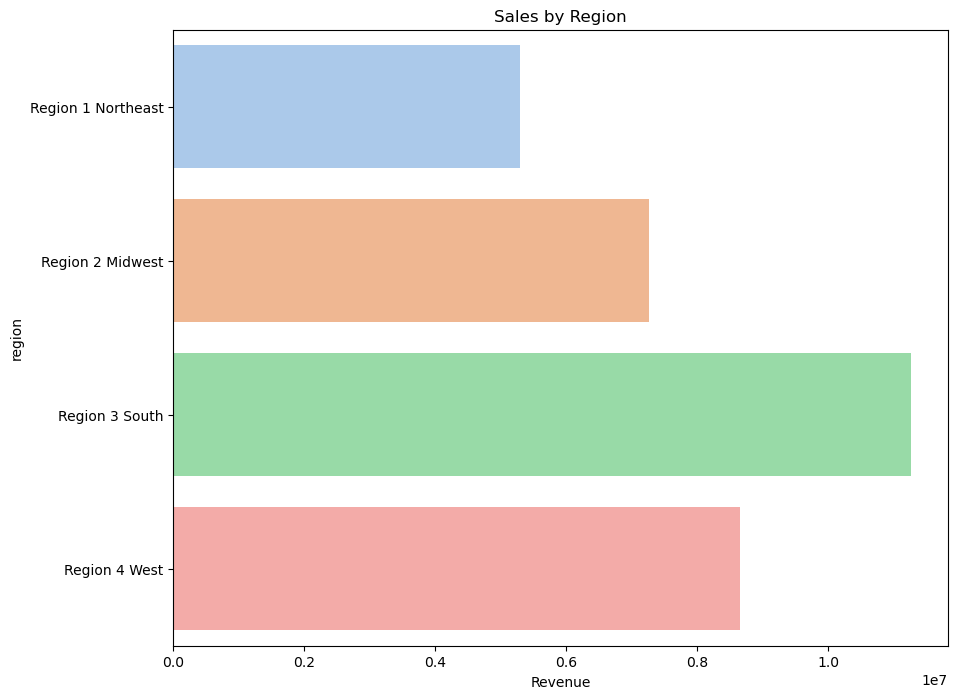

In [23]:
# Visualizing the revenue per region
plt.figure(figsize=(10, 8))

sns.barplot(y='region', x='order_total', data=revenue_region, palette="pastel", order=revenue_region.sort_values('region', ascending = True).region)
plt.title('Sales by Region')
plt.xlabel('Revenue')

# Save the figure to subfolder
plt.savefig(os.path.join(path, '04 Analysis', 'sales_by_regi.jpg'), format='jpg', dpi=300)

# Show the plot
plt.show()

The End